<a href="https://colab.research.google.com/github/ethvedbitdesjan/IntroToClassification/blob/main/ML_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('content/')

Mounted at content/


In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from IPython.display import display, clear_output
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.feature_selection import SelectKBest, f_classif
from torch.utils.data import TensorDataset, DataLoader

# Display the agenda and introduction
print("AI/ML Training Session")
print("================================================")
print("\nAgenda:")
print("-------")
print("1. Introduction")
print("2. Part 1: Theoretical Concepts")
print("3. Part 2: Hands-on ML Pipeline")
print("4. Part 3: Q&A and Wrap-up (30 minutes)")
print("\nLet's get started!")

AI/ML Training Session

Agenda:
-------
1. Introduction
2. Part 1: Theoretical Concepts
3. Part 2: Hands-on ML Pipeline
4. Part 3: Q&A and Wrap-up (30 minutes)

Let's get started!


In [3]:
# Types of Machine Learning
print("\nTypes of Machine Learning:")
print("--------------------------")
print("1. Supervised Learning: Learning from labeled data.")
print("2. Unsupervised Learning: Learning from unlabeled data.")
print("3. Reinforcement Learning: Learning by interacting with an environment.")


Types of Machine Learning:
--------------------------
1. Supervised Learning: Learning from labeled data.
2. Unsupervised Learning: Learning from unlabeled data.
3. Reinforcement Learning: Learning by interacting with an environment.


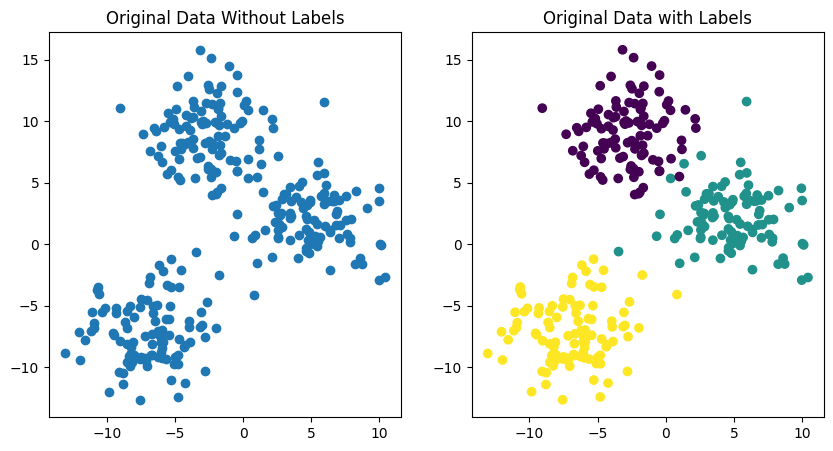

In [4]:
X, y = make_blobs(n_samples=300, centers=3, cluster_std=2.5, random_state=42)

# Plot the data

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].scatter(X[:, 0], X[:, 1])
axes[0].set_title("Original Data Without Labels")
axes[1].scatter(X[:, 0], X[:, 1], c=y)
axes[1].set_title("Original Data with Labels")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


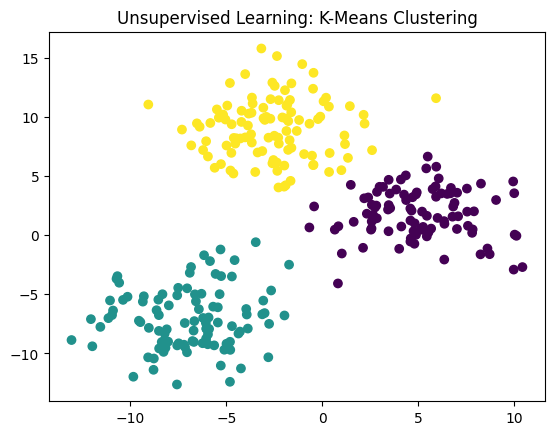

In [5]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans)
plt.title("Unsupervised Learning: K-Means Clustering")
plt.show()

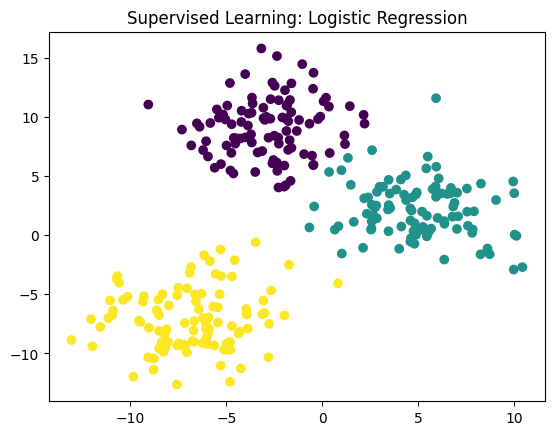

In [6]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Predict on the test set
y_pred = log_reg.predict(X)

# Plot the predictions
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Supervised Learning: Logistic Regression")
plt.show()

In [7]:
# Explanation of Training and Test Data
print("\nTraining and Test Data:")
print("------------------------")
print("Training Data: The subset of data used to train the machine learning model.")
print("Test Data: The subset of data used to evaluate the performance of the trained model.")


Training and Test Data:
------------------------
Training Data: The subset of data used to train the machine learning model.
Test Data: The subset of data used to evaluate the performance of the trained model.


In [8]:
# Generate sample data
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).flatten()
y[::5] += 3 * (0.5 - np.random.rand(16))

# X = np.linspace(0, 10, 100)
# y = X**3 + np.random.normal(0, 0.5, 100)

# X = X.reshape((X.shape[0], 1))

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
X.shape, y.shape

((80, 1), (80,))

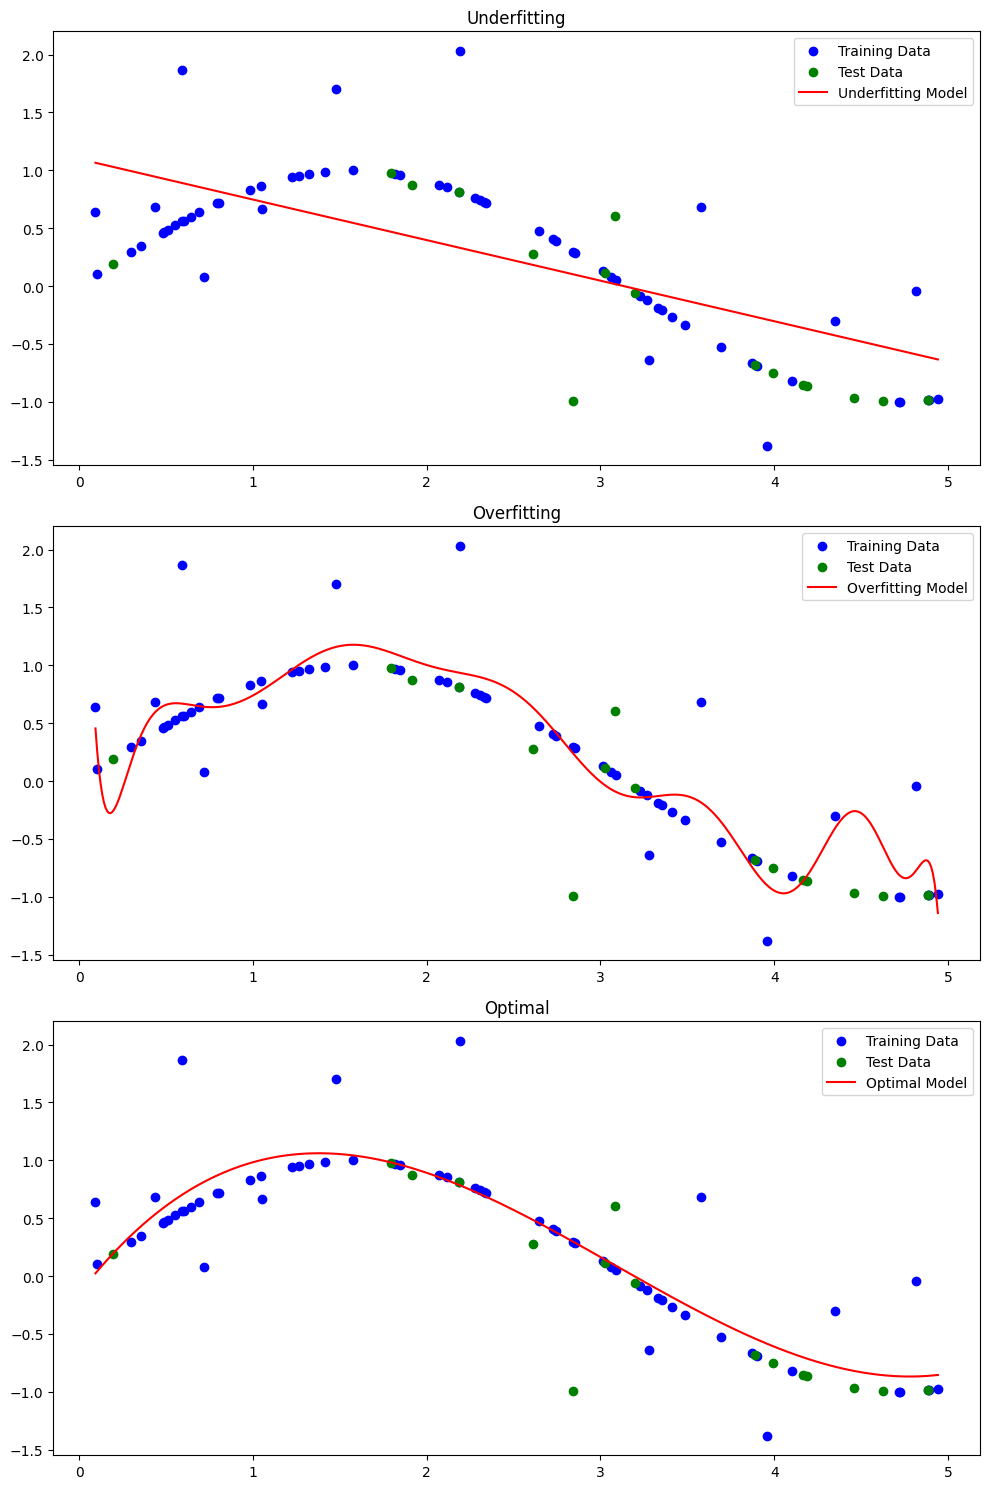

In [10]:
# Generate smooth curve points
X_smooth = np.linspace(X.min(), X.max(), 500)

# Linear Regression (Underfitting)
coeff_linear = np.polyfit(X_train.flatten(), y_train, 1)
y_pred_train_linear = np.polyval(coeff_linear, X_train.flatten())
y_pred_test_linear = np.polyval(coeff_linear, X_test.flatten())
y_smooth_linear = np.polyval(coeff_linear, X_smooth)

# Polynomial Regression (Overfitting)
coeff_over = np.polyfit(X_train.flatten(), y_train, 15)
y_pred_train_poly_over = np.polyval(coeff_over, X_train.flatten())
y_pred_test_poly_over = np.polyval(coeff_over, X_test.flatten())
y_smooth_over = np.polyval(coeff_over, X_smooth)

# Polynomial Regression (Optimal)
coeff_opt = np.polyfit(X_train.flatten(), y_train, 3)
y_pred_train_poly_opt = np.polyval(coeff_opt, X_train.flatten())
y_pred_test_poly_opt = np.polyval(coeff_opt, X_test.flatten())
y_smooth_opt = np.polyval(coeff_opt, X_smooth)

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Underfitting Plot
axes[0].scatter(X_train, y_train, color='blue', label='Training Data')
axes[0].scatter(X_test, y_test, color='green', label='Test Data')
axes[0].plot(X_smooth, y_smooth_linear, color='red', label='Underfitting Model')
axes[0].set_title('Underfitting')
axes[0].legend()

# Overfitting Plot
axes[1].scatter(X_train, y_train, color='blue', label='Training Data')
axes[1].scatter(X_test, y_test, color='green', label='Test Data')
axes[1].plot(X_smooth, y_smooth_over, color='red', label='Overfitting Model')
axes[1].set_title('Overfitting')
axes[1].legend()

# Optimal Plot
axes[2].scatter(X_train, y_train, color='blue', label='Training Data')
axes[2].scatter(X_test, y_test, color='green', label='Test Data')
axes[2].plot(X_smooth, y_smooth_opt, color='red', label='Optimal Model')
axes[2].set_title('Optimal')
axes[2].legend()

plt.tight_layout()
plt.show()

In [11]:
mse_train_linear = mean_squared_error(y_train, y_pred_train_linear)
mse_test_linear = mean_squared_error(y_test, y_pred_test_linear)

mse_train_poly_over = mean_squared_error(y_train, y_pred_train_poly_over)
mse_test_poly_over = mean_squared_error(y_test, y_pred_test_poly_over)

mse_train_poly_opt = mean_squared_error(y_train, y_pred_train_poly_opt)
mse_test_poly_opt = mean_squared_error(y_test, y_pred_test_poly_opt)

print(f"Linear Model - MSE Train: {mse_train_linear}, MSE Test: {mse_test_linear}")
print(f"Overfitting Model - MSE Train: {mse_train_poly_over}, MSE Test: {mse_test_poly_over}")
print(f"Optimal Model - MSE Train: {mse_train_poly_opt}, MSE Test: {mse_test_poly_opt}")

Linear Model - MSE Train: 0.25028053380735155, MSE Test: 0.2763670518395735
Overfitting Model - MSE Train: 0.09412523840809277, MSE Test: 0.20237920204515286
Optimal Model - MSE Train: 0.12068744745950677, MSE Test: 0.1324968984450798


In [12]:
%cd /content/content/MyDrive/DLab_AI ML_Training

/content/content/MyDrive/DLab_AI ML_Training


In [56]:
# Step 1: Load the Dataset
# You can download the dataset from a source and upload it, or use a direct link.
# For this example, let's assume you've downloaded and uploaded the dataset to the same directory as your notebook.

electricity_data = pd.read_csv('powerconsumption.csv')
electricity_data.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [57]:
#For simplicity we will only predict zone1

electricity_data.drop('PowerConsumption_Zone2', axis=1, inplace=True)
electricity_data.drop('PowerConsumption_Zone3', axis=1, inplace=True)
electricity_data['PowerConsumption'] = electricity_data['PowerConsumption_Zone1']
electricity_data.drop('PowerConsumption_Zone1', axis=1, inplace=True)


electricity_data.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620


In [58]:
#We are going to drop the datetime column to make the task more challenging
#electricity_data['Datetime'] = electricity_data.index
electricity_data.drop('Datetime', axis=1, inplace=True)
electricity_data.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption
0,6.559,73.8,0.083,0.051,0.119,34055.69620
1,6.414,74.5,0.083,0.070,0.085,29814.68354
2,6.313,74.5,0.080,0.062,0.100,29128.10127
3,6.121,75.0,0.083,0.091,0.096,28228.86076
4,5.921,75.7,0.081,0.048,0.085,27335.69620


In [59]:
# Part 2.1: Data Cleaning and Preprocessing

# Handling Missing Values
electricity_data.dropna(inplace=True)

# Data Transformation (Example: Log Transformation)
electricity_data['PowerConsumption'] = np.log1p(electricity_data['PowerConsumption'])

#What: This line applies a log transformation to the PowerConsumption column.
#Why: Log transformation is commonly used to stabilize variance and make the data more closely follow a normal distribution. This can improve the performance of certain algorithms.


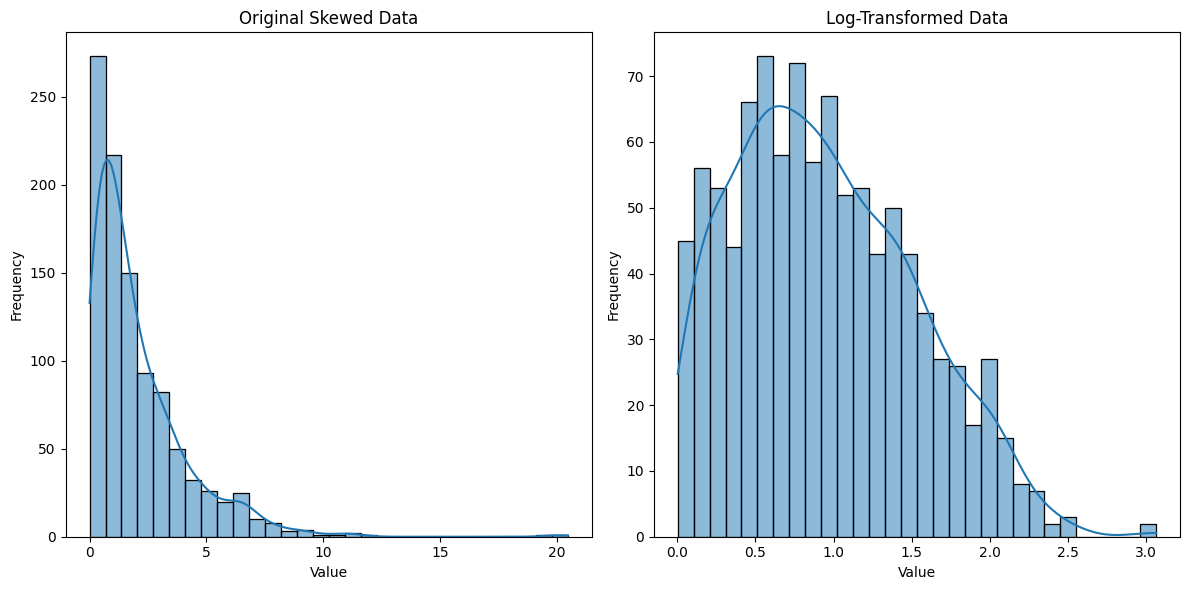

In [60]:
# Generate skewed data
data = np.random.exponential(scale=2, size=1000)

# Plot original data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data, bins=30, kde=True)
plt.title('Original Skewed Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Apply log transformation
log_data = np.log1p(data)

# Plot log-transformed data
plt.subplot(1, 2, 2)
sns.histplot(log_data, bins=30, kde=True)
plt.title('Log-Transformed Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

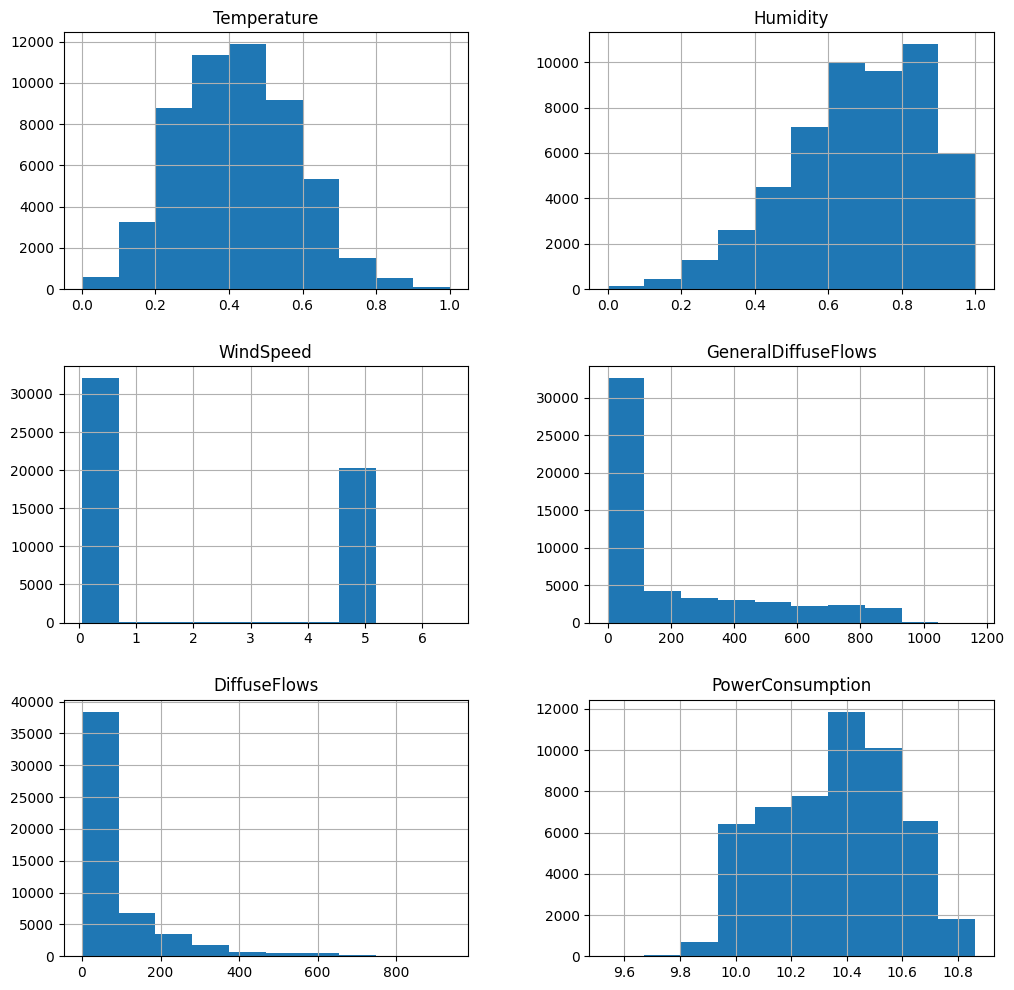

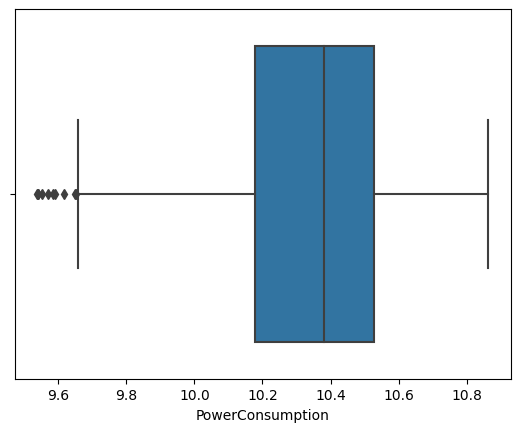

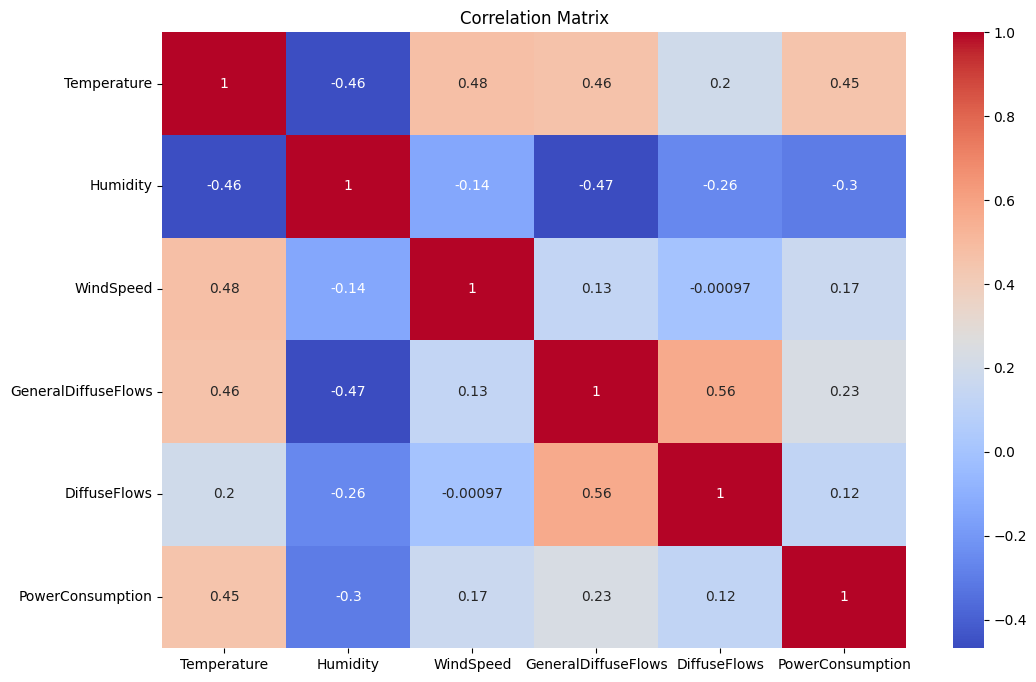

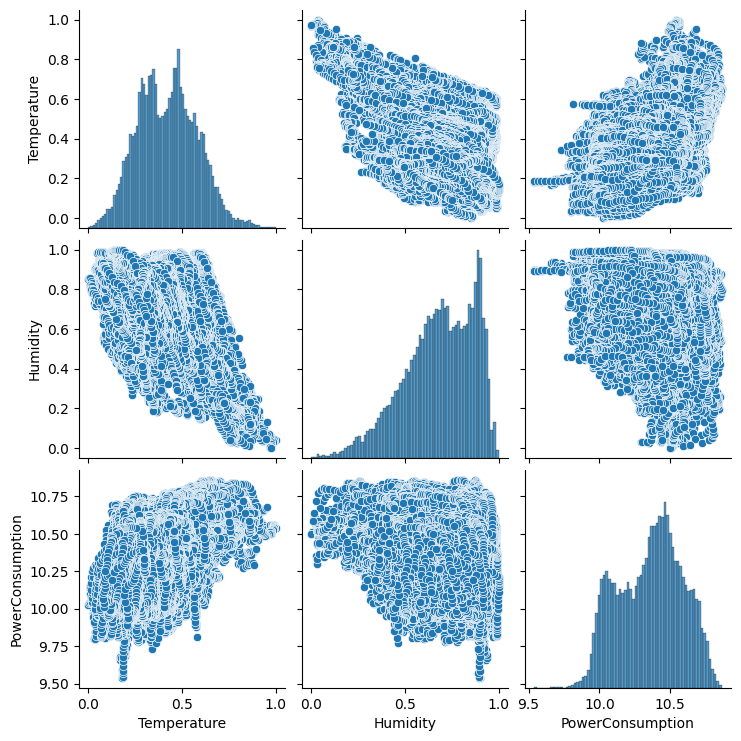

In [61]:
# Feature Scaling (Normalization)
scaler = MinMaxScaler()
electricity_data[['Temperature', 'Humidity']] = scaler.fit_transform(electricity_data[['Temperature', 'Humidity']])

# Part 2.2: Exploratory Data Analysis (EDA)

# Data Visualization: Histograms
electricity_data.hist(figsize=(12, 12))
plt.show()

# Data Visualization: Boxplots for outlier detection
sns.boxplot(x=electricity_data['PowerConsumption'])
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(electricity_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot for selected features
sns.pairplot(electricity_data[['Temperature', 'Humidity', 'PowerConsumption']])
plt.show()

In [62]:
# Feature Selection: Using SelectKBest
X = electricity_data.drop('PowerConsumption', axis=1)
y = electricity_data['PowerConsumption']
selector = SelectKBest(score_func=f_classif, k=3)
fit = selector.fit(X, y)
features = fit.transform(X)

# Show important features
important_features = pd.DataFrame(fit.scores_, index=X.columns, columns=['Score'])
print("Important Features:\n", important_features.sort_values(by='Score', ascending=False))

Important Features:
                         Score
Temperature          7.716794
GeneralDiffuseFlows  2.480855
WindSpeed            2.273179
DiffuseFlows         1.703269
Humidity             1.556557


In [144]:
# Part 2.3: Model Training

# Train-Test Split
from sklearn.model_selection import train_test_split
X = electricity_data.drop('PowerConsumption', axis=1)
y = electricity_data['PowerConsumption']
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)

In [145]:
# Initialize and train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.039224942401058185


In [146]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error (Random Forest): {mse_rf}")

Mean Squared Error (Random Forest): 0.03486523437466151


In [153]:
# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train).cuda()
y_train_tensor = torch.FloatTensor(y_train.values).cuda()
X_test_tensor = torch.FloatTensor(X_test).cuda()
y_test_tensor = torch.FloatTensor(y_test.values).cuda()

train_data = TensorDataset(X_train_tensor, y_train_tensor)
test_data = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 32  # You can change this value
train_dataloader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_dataloader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

In [155]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        preds = self.linear(x)
        return preds

class SimpleMLP(nn.Module):
    def __init__(self, input_dim):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 50)  # Hidden layer with 50 neurons
        self.fc2 = nn.Linear(50, 1)  # Output layer with 1 neuron

    def forward(self, x):
        x = self.fc1(x)
        x = torch.relu(x)  # ReLU activation
        x = self.fc2(x)
        return x

In [166]:
input_dim = X_train.shape[1]
#model = LinearRegressionModel(input_dim)
model = SimpleMLP(input_dim)

# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

model.cuda()
# Training Loop
epochs = 10
model.train()

# Training loop
all_losses = []
for epoch in range(epochs):  # 10 epochs, you can change this value
    total_loss = 0
    for batch_idx, (X_batch, y_batch) in enumerate(train_dataloader):
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        y_pred = model(X_batch)

        # Compute the loss

        loss = criterion(y_pred, y_batch.view(-1, 1))
        total_loss += loss.item()
        # Backward pass
        loss.backward()
        #break
        # Update the parameters
        optimizer.step()
    all_losses.append(total_loss)

In [167]:
# Initialize variables to zero
test_loss = 0
count = 0

# Set the model to evaluation mode
model.eval()

# No need to track gradients for validation, saves memory and computations
all_preds = []
all_targets = []
with torch.no_grad():
    for X_batch, y_batch in test_dataloader:
        # Forward pass
        y_pred = model(X_batch)

        # Compute loss
        all_preds.append(y_pred.cpu().detach())
        all_targets.append(y_batch.cpu().detach())

        # Accumulate loss and count
        # test_loss += loss.item()
        # count += 1

# Calculate average test loss
# print(test_loss, count)
# average_test_loss = test_loss / count
# print(f"Average Test Loss: {average_test_loss}")

preds = torch.cat(all_preds)
targets = torch.cat(all_targets)
mse_rf = mean_squared_error(preds, targets)
print(f"Mean Squared Error: {mse_rf}")

Mean Squared Error: 0.04357539489865303
